# Image -> ASCII
En este proyecto trataré de transformar una imagen dada a un txt u otro jpg donde los pixeles sean caracteres ascii.

El notebook tiene varias secciones (ver indice). En cada una de ellas se definirán las funciones que se usen, esto genera mucho código repetido pero de esta forma a la hora de acceder a una parte concreta del proyecto unicamente sera necesarío ejecutar las celdas de esa parte.

# Pruebas

In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance

In [49]:
os.getcwd()

'c:\\Users\\javim\\Desktop\\Mis Proyectos\\Image2Ascii\\notebook'

In [50]:
img = cv.imread('in/modus.jpg')
img.shape

(1200, 1200, 3)

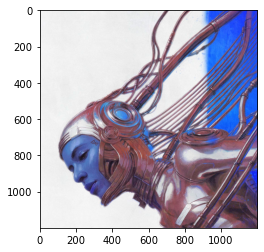

In [51]:
plt.imshow(img)

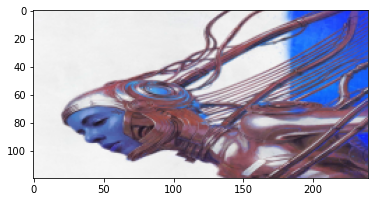

In [52]:
#o primero que queremos es reducir el tamaño de la imagen para que haya menos pixeles que procesar y 
# se noten y vean algo los caracteres. Lo segundo, debemos achatarlo verticalmente, ya que los pixeles son
# cuadrados pero los caracteres no, sino al hacer la traslacion quedaría una imagen estirada
imgr = cv.resize(img,(int(img.shape[1] * 0.2), int(img.shape[0] * 0.1)), interpolation = cv.INTER_AREA)
imgr.shape
plt.imshow(imgr)

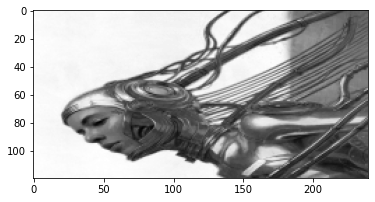

In [53]:
#pasamos a BnW por que la gracia está en jugar con escala de grises
imgrbw = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
plt.imshow(imgrbw, cmap = 'gray')

### Ya sabemos como hacer la transformacion de nuestra imagen
### Ahora toca el tema de los ascii, primero vamos a ordenar los ascii por intensidad
Debemos seleccionar una fuente ancho fijo y que de verdad ocupe la letra el ancho, que sea versatil, que pueda tener mucho negro y al mismo tiempo poco algo parecido a consola.
La fuente seleccionada esta en la carpeta fonts, se puede instalar pero no es necesario, puedes usar "consolas".
Todos los caracteres que se van a usar los he exportado como jpg en Photoshop para poder analizar que cantidad de negro tiene cada uno, es lo que haremos a continuacion.

(31, 22, 3)
255


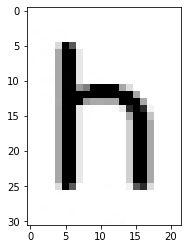

In [54]:
img = cv.imread('fonts/68.jpg')
imgrbw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
print(img[0][0][0])
plt.imshow(imgrbw, cmap = "gray")

In [55]:
range(img.shape[0])

range(0, 31)

In [56]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [57]:
print(porcentajeNegro('fonts/116.jpg'))

0.11608303145305043


In [58]:
#vamos a juntar en paralelo el array del numero de imagen con el de %negro de cada caracter
blkP =[]
number = []
for x in range(61,143):
    blk = porcentajeNegro('fonts/'+str(x)+'.jpg')
    blkP.append(blk)
    number.append(x)
asciBlacks = np.vstack((number, blkP))
print(asciBlacks)

[[6.10000000e+01 6.20000000e+01 6.30000000e+01 6.40000000e+01
  6.50000000e+01 6.60000000e+01 6.70000000e+01 6.80000000e+01
  6.90000000e+01 7.00000000e+01 7.10000000e+01 7.20000000e+01
  7.30000000e+01 7.40000000e+01 7.50000000e+01 7.60000000e+01
  7.70000000e+01 7.80000000e+01 7.90000000e+01 8.00000000e+01
  8.10000000e+01 8.20000000e+01 8.30000000e+01 8.40000000e+01
  8.50000000e+01 8.60000000e+01 8.70000000e+01 8.80000000e+01
  8.90000000e+01 9.00000000e+01 9.10000000e+01 9.20000000e+01
  9.30000000e+01 9.40000000e+01 9.50000000e+01 9.60000000e+01
  9.70000000e+01 9.80000000e+01 9.90000000e+01 1.00000000e+02
  1.01000000e+02 1.02000000e+02 1.03000000e+02 1.04000000e+02
  1.05000000e+02 1.06000000e+02 1.07000000e+02 1.08000000e+02
  1.09000000e+02 1.10000000e+02 1.11000000e+02 1.12000000e+02
  1.13000000e+02 1.14000000e+02 1.15000000e+02 1.16000000e+02
  1.17000000e+02 1.18000000e+02 1.19000000e+02 1.20000000e+02
  1.21000000e+02 1.22000000e+02 1.23000000e+02 1.24000000e+02
  1.2500

(array([ 1.,  1.,  3.,  0.,  1.,  5.,  7.,  9.,  9.,  6.,  8., 15.,  4.,
         6.,  5.,  0.,  1.,  0.,  1.]),
 array([0.01613478, 0.02937061, 0.04260643, 0.05584225, 0.06907808,
        0.0823139 , 0.09554972, 0.10878555, 0.12202137, 0.1352572 ,
        0.14849302, 0.16172884, 0.17496467, 0.18820049, 0.20143631,
        0.21467214, 0.22790796, 0.24114379, 0.25437961, 0.26761543]),
 <BarContainer object of 19 artists>)

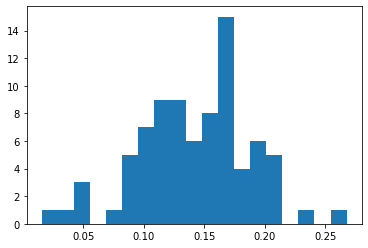

In [59]:
#ploteamos un histograma del %negro para ver un poco la distribucion
plt.hist(asciBlacks[1], bins = 19)

In [60]:
#hayamos que el punto mas claro o mas negro es el 113 (@)
print(asciBlacks[0][asciBlacks[1] == max(asciBlacks[1])], max(asciBlacks[1]))

[112.] 0.2676154332700822


In [61]:
#hayamos que el punto menos claro o menos negro es el 102 (.)
print(asciBlacks[0][asciBlacks[1] == min(asciBlacks[1])], min(asciBlacks[1])) 

[101.] 0.016134782358691258


### Ya hemos analizado nuestros asciis, como vemos tienen un rango de [0.016%, 0.26%]
Como nos la queremos complicar, hemos usado una fuente externa, editado y de suerte nos ha funcionado cuando podriamos haber usado consolas que es ancho fijo pero bueno.
Ahora vamos a normalizar este rango a [0:225] y despues vamos a asociarle a cada valor la letra que le corresponde para empezar ya a tener el "pincel" listo

In [62]:
norm = []
for x in asciBlacks[1]:
    aux = x - min(asciBlacks[1])
    aux = aux / (max(asciBlacks[1]) - min(asciBlacks[1]))
    aux = aux * 255
    norm.append(aux)
pincel = np.vstack((asciBlacks,norm))
print(max(pincel[2]))

255.0


(array([ 1.,  1.,  3.,  0.,  1.,  5.,  7.,  9.,  9.,  6.,  8., 15.,  4.,
         6.,  5.,  0.,  1.,  0.,  1.]),
 array([  0.        ,  13.42105263,  26.84210526,  40.26315789,
         53.68421053,  67.10526316,  80.52631579,  93.94736842,
        107.36842105, 120.78947368, 134.21052632, 147.63157895,
        161.05263158, 174.47368421, 187.89473684, 201.31578947,
        214.73684211, 228.15789474, 241.57894737, 255.        ]),
 <BarContainer object of 19 artists>)

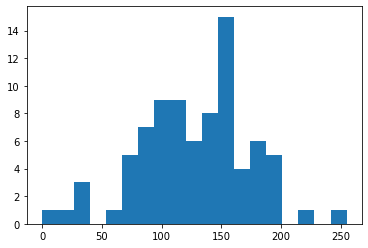

In [63]:
plt.hist(pincel[2], bins = 19)

In [64]:
#ahora toca asociar los valores a mano...
chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
print(len(chars), len(pincel[0]))
pincel = np.vstack((pincel,chars))

84 82


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 82 and the array at index 1 has size 84

In [ ]:
#por ultimo vamos a ordenar el array por la intensidad de pixel
print(max(norm))
norm = np.array(norm)
pincel[0]=pincel[0][norm.argsort()]
pincel[1]=pincel[1][norm.argsort()]
pincel[3]=pincel[3][norm.argsort()]
pincel[2]=pincel[2][norm.argsort()]

255.0


In [ ]:
print(pincel[2])

['0.0' '16.185663656110695' '26.855607636904086' '37.572196181548016'
 '38.178575511604045' '54.16016920086892' '69.66948668114784'
 '72.74219732479712' '77.93140505316113' '78.85846575968904'
 '79.07419686749745' '83.7503143935064' '84.35086315308112'
 '84.79398650966046' '84.8872756373614' '90.3855036012347'
 '90.75866011203838' '91.3242254487253' '94.23368011889788'
 '94.56602263633246' '96.42014404938837' '101.34697610609355'
 '102.11078083914487' '102.84543271978966' '103.81330741968678'
 '105.37590030867734' '106.12221333028475' '110.69921115811144'
 '111.18314850805989' '111.69623871041507' '114.83891619983997'
 '114.83891619983997' '117.25277237910139' '118.5938035898022'
 '119.17103006745174' '120.71030067451696' '121.95221218703554'
 '123.40985480736254' '123.84131702297937' '123.84131702297937'
 '124.6226134674746' '124.6226134674746' '130.79135703669834'
 '131.24031096375896' '134.53458328569798' '135.27506573682408'
 '136.30707671201552' '138.36526809191727' '140.032811249

### Ya tenemos nuestro pincel mas que listo
## PINCEL [imgNum, blk%, norm, char]
Ahora nos queda la pintacion SIUUUUUU.
La idea es que dada una imagen y una resolucion, la resizeemos y pongamos en blanco y negro (quiza necesitemos hacerle un preedit), teniendo en cuenta que nuestros caracteres no son cuadrados, y ya con eso ir leyendo y pintando con nuestros chars. Deberemos tambien definir una funcion selectora de los chars


# FINAL Img2Ascii 
Aqui está lo imprescindible para ejecutar el invento

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance
from IPython.display import clear_output

In [ ]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [ ]:
#Selector caracter
def charSelektor(pincel, pixel):
    dist = 256
    i = 0
    while ( i < pincel.shape[1]) and (abs(pixel - float(pincel[0][i])) <= dist ):
        dist = pixel - float(pincel[0][i])
        i = i + 1
        
    if i == pincel.shape[1]-1:
        if (pixel-float(pincel[0][i])) <= (pixel- float(pincel[0][i-1])):
            return pincel[1][i]
            
    return pincel[1][i-1]

In [ ]:
#la funcion principal
def imgToAscii(imgstr, pincel, res, contrast = 1):
    img = cv.imread(imgstr)
    imgr = cv.resize(img,(int(img.shape[1] * res*2), int(img.shape[0] * res)), interpolation = cv.INTER_AREA)
    imagen = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
    if(contrast != 1):
        im = Image.fromarray(imagen)
        enh = ImageEnhance.Contrast(im)
        im = enh.enhance(contrast)
        imagen = np.array(im)
    file = open('out/canvas.txt', 'w')
    tot = imagen.shape[0]
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):
            file.write(charSelektor(pincel,imagen[i][j]))
        file.write('\n')
        clear_output()
        print(str(int(100*i/tot) )+ '%')
    file.close()
    clear_output()
    print("100%")

In [ ]:
#Esta funcion nos permitirá obtener nuestro pincel y definir su escritura (negativa o no)
# basicamente es un conglomerado del analisis de los caracteres hecho anteriormente
def getPincel(invert = False):
    blkP =[]
    number = []
    for x in range(61,143):
        blkP.append(porcentajeNegro('fonts/'+str(x)+'.jpg', invert))

    norm = []
    for x in blkP:
        aux = x - min(blkP)
        aux = aux / (max(blkP) - min(blkP))
        aux = aux * 255
        norm.append(aux)

    chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
    pincel = np.vstack((norm,chars))
    norm = np.array(norm)
    pincel[0]=pincel[0][norm.argsort()]
    pincel[1]=pincel[1][norm.argsort()]
    return pincel

In [ ]:
#el parametro invert crea un pincel con los colores invertidos,
#si usas un visor de texto con fondo blanco usa invert = True, sino False
pincel = getPincel(invert = True)
#parametros:
# imagen a renderizar,
#pincel, 
#ratio de compresion: complejidad(On^2), cuidado
#contraste: <1 = menos contraste, >1 = mayor contraste. Es un parametro interesante para la calidad del resultado
imgToAscii('in/modus.jpg', pincel, 0.05, 1.5)

100%


# FINAL OPTIMIZADO img2Ascii
voy a intentar optimizar el código anterior y usar numba para paralelizar. Y si diosito me acompaña para hacerlo con GPU.
De momento nos conformamos con codigo optimizado, nada de paralelizar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance
from IPython.display import clear_output
#from numba import jit, cuda

Numba: https://www.youtube.com/watch?v=x58W9A2lnQc

Threading: https://www.youtube.com/watch?v=fKl2JW_qrso

---



In [ ]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [ ]:
#Selector caracter
def charSelektor(pincel, pixel):
    dist = 256
    i = 0
    while ( i < pincel.shape[1]) and (abs(pixel - float(pincel[0][i])) <= dist ):
        dist = pixel - float(pincel[0][i])
        i = i + 1
        
    if i == pincel.shape[1]-1:
        if (pixel-float(pincel[0][i])) <= (pixel- float(pincel[0][i-1])):
            return pincel[1][i]
            
    return pincel[1][i-1]

In [ ]:
def getStringLines(img, pincel):
  typo = '|S'+str(img.shape[1])
  lines = np.empty(img.shape[0], dtype=typo)
  for i in range(0,img.shape[0]):
    aux = np.chararray(img.shape[1])
    for j in range(0,img.shape[1]):
      aux[j] = pincel[img[i][j]]
    string = ''
    for char in aux:
      string = string + str(char)
    lines[i] = str(string)
  return lines

In [ ]:
def img2Ascii(imgstr, pincel, res, contrast = 1):
    img = cv.imread(imgstr)
    imgr = cv.resize(img,(int(img.shape[1] * res*2), int(img.shape[0] * res)), interpolation = cv.INTER_AREA)
    imagen = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
    if(contrast != 1):
        im = Image.fromarray(imagen)
        enh = ImageEnhance.Contrast(im)
        im = enh.enhance(contrast)
        imagen = np.array(im)
    tot = imagen.shape[0]
    with open("out/canvas.txt", "w") as file:
      for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):
          file.write(str(pincel[imagen[i][j]]))
        file.write('\n')
        clear_output()
        print(str(int(100*i/tot) )+ '%')
      file.close()
    clear_output()
    print("100%")
    plt.imshow(imagen, cmap="gray")

In [ ]:
#Esta funcion nos permitirá obtener nuestro pincel y definir su escritura (negativa o no)
# basicamente es un conglomerado del analisis de los caracteres hecho anteriormente
# Esta optimizado para devolver unicamente un array de 256 pos que serían el valor de los pixels con el caracter correspondiente
def getPincelOp(invert = False):
    blkP =[]
    number = []
    for x in range(61,143):
        blkP.append(porcentajeNegro('fonts/'+str(x)+'.jpg', invert))

    norm = []
    for x in blkP:
        aux = x - min(blkP)
        aux = aux / (max(blkP) - min(blkP))
        aux = aux * 255
        norm.append(aux)

    chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
    pincel = np.vstack((norm,chars))
    norm = np.array(norm)
    pincel[0]=pincel[0][norm.argsort()]
    pincel[1]=pincel[1][norm.argsort()]
    pincel = getPincelSimple(pincel)
    return pincel

In [ ]:
def getPincelSimple(pincel):
  pincelS = []
  for i in range(0,256):
    pincelS.append(charSelektor(pincel, i))

  return pincelS

100%


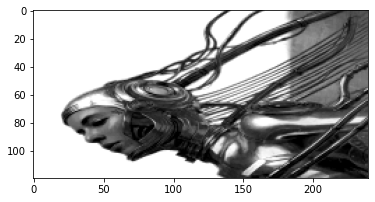

In [ ]:
#el parametro invert crea un pincel con los colores invertidos,
#si usas un visor de texto con fondo blanco usa invert = True, sino False
pincel= getPincelOp(invert = True)
#parametros:
# imagen a renderizar,
#pincel, 
#ratio de compresion: complejidad(On^2), cuidado
#contraste: <1 = menos contraste, >1 = mayor contraste. Es un parametro interesante para la calidad del resultado
img2Ascii('in/modus.jpg', pincel, 0.1, 1.5)

## Prueba de tiempo: Sin Optimizar vs Codigo Optimizado

100%
Tiempo NO Optimizado: 116.3s

   Tiempo Optimizado: 1.0s

Optimizacion : 11527.3%


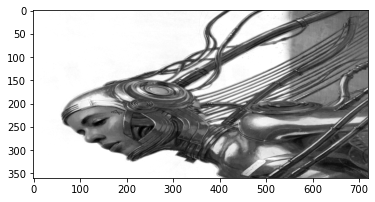

In [ ]:
import time
#prueba no Optimizado
pincelNOp = getPincel(invert=True)
startNOp = time.time()
imgToAscii("in/modus.jpg", pincelNOp, 0.3, 1.2)
endNOp = time.time()
#prueba Optimzado
pincelOP = getPincelOp(invert = True)
startOp = time.time()
img2Ascii("in/modus.jpg", pincelOP, 0.3, 1.2)
endOp = time.time()

timeOP = endOp - startOp
timeNOP = endNOp - startNOp
print("Tiempo NO Optimizado: "+ str(round(timeNOP,1))+ "s\n")
print("   Tiempo Optimizado: "+ str(round(timeOP,1))+ "s\n")

faster = (timeNOP/timeOP)*100
print("Optimizacion : "+str(round(faster,1))+ "%")

# Image2Ascii2Video
Vamos a automatizar el convertirlo en imagen y luego lo vamos a juntar todo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance, ImageFont, ImageDraw
from IPython.display import clear_output

In [ ]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [ ]:
#Selector caracter
def charSelektor(pincel, pixel):
    dist = 256
    i = 0
    while ( i < pincel.shape[1]) and (abs(pixel - float(pincel[0][i])) <= dist ):
        dist = pixel - float(pincel[0][i])
        i = i + 1
        
    if i == pincel.shape[1]-1:
        if (pixel-float(pincel[0][i])) <= (pixel- float(pincel[0][i-1])):
            return pincel[1][i]
            
    return pincel[1][i-1]

In [ ]:
def getStringLines(img, pincel):
  typo = '|S'+str(img.shape[1])
  lines = np.empty(img.shape[0], dtype=typo)
  for i in range(0,img.shape[0]):
    aux = np.chararray(img.shape[1])
    for j in range(0,img.shape[1]):
      aux[j] = pincel[img[i][j]]
    string = ''
    for char in aux:
      string = string + str(char)
    lines[i] = str(string)
  return lines

In [ ]:
#Ahora esta funcion podra o bien escribir en fichero o devolver un string con todos los datos
#Esta mickey herramienta nos vendra de locos luego
def img2Ascii(pincel, res, contrast = 1, imgstr = "", cvimage = None, writefile = False):
    if(imgstr == ""):
      img = cvimage
    else:
      img = cv.imread(imgstr)
    imgr = cv.resize(img,(int(img.shape[1] * res*1.75), int(img.shape[0] * res)), interpolation = cv.INTER_AREA)
    imagen = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
    if(contrast != 1):
        im = Image.fromarray(imagen)
        enh = ImageEnhance.Contrast(im)
        im = enh.enhance(contrast)
        imagen = np.array(im)
    tot = imagen.shape[0]
    churro =""
    for i in range(0,imagen.shape[0]):
      for j in range(0,imagen.shape[1]):
          churro = churro+str(pincel[imagen[i][j]])
      churro = churro+'\n'
    if(writefile):
      with open('out/canvas.txt','w') as file:
        file.write(churro)
    return churro

In [ ]:
#Esta funcion nos permitirá obtener nuestro pincel y definir su escritura (negativa o no)
# basicamente es un conglomerado del analisis de los caracteres hecho anteriormente
# Esta optimizado para devolver unicamente un array de 256 pos que serían el valor de los pixels con el caracter correspondiente
def getPincelOp(invert = False):
    blkP =[]
    number = []
    for x in range(61,143):
        blkP.append(porcentajeNegro('fonts/'+str(x)+'.jpg', invert))

    norm = []
    for x in blkP:
        aux = x - min(blkP)
        aux = aux / (max(blkP) - min(blkP))
        aux = aux * 255
        norm.append(aux)

    chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
    pincel = np.vstack((norm,chars))
    norm = np.array(norm)
    pincel[0]=pincel[0][norm.argsort()]
    pincel[1]=pincel[1][norm.argsort()]
    pincel = getPincelSimple(pincel)
    return pincel

In [ ]:
def getPincelSimple(pincel):
  pincelS = []
  for i in range(0,256):
    pincelS.append(charSelektor(pincel, i))

  return pincelS

In [ ]:
# better use asciiToImage.py
def img2Ascii2img(image, pincel, res, contrast = 1, blackBackground = False):
  churro = img2Ascii(pincel,res,contrast, cvimage=image)
  if(blackBackground == False):
    img = Image.new("RGB", (int(19 *res*image.shape[1]), int(19*res*image.shape[0])), (255, 255, 255)) 
    color = (0,0,0)
  else:
    img = Image.new("RGB", (int(19 *res*image.shape[1]), int(19*res*image.shape[0])), (0, 0, 0)) 
    color = (255, 255, 255)
  #elegimos consolas
  font = ImageFont.truetype('fonts/consola.ttf',20)
  image_editable = ImageDraw.Draw(img)
  image_editable.text((10,10), churro, color, font=font)
  return img

In [ ]:
def getFrame(video, nframe):
  video.set(cv.CAP_PROP_POS_FRAMES, nframe)
  byt,frame = video.read()
  return byt, frame

In [ ]:
#vidstr: video path
#pincel: pincel
#res: resolution ratio (if res = 0.5 : [300x300] -> [150x150])
#freq_comp: frecuency compression (if freq_comp = 2 : 60fps ->30fps )
#contrast: contraste (if 1.5 more contrast i.e)
def img2Ascii2Video(vidstr, pincel, res, freq_comp, contrast = 1, blackBackground = False):
  videoin = cv.VideoCapture(vidstr);
  totframes = int(videoin.get(cv.CAP_PROP_FRAME_COUNT))
  nframe = 0
  byt,frame=getFrame(videoin,nframe)
  videout = cv.VideoWriter('out/videocanvas.avi', cv.VideoWriter_fourcc(*'DIVX'),int(videoin.get(cv.CAP_PROP_FPS)/3),(int(19 *res*frame.shape[1]), int(19*res*frame.shape[0])))
  
  while byt :
    frameAscii =np.array(img2Ascii2img(frame, pincel, res, contrast,blackBackground))
    videout.write(frameAscii)
    nframe = nframe + freq_comp
    byt,frame = getFrame(videoin, nframe)
    clear_output()
    print('Video: '+str(int(nframe/totframes * 100))+'%\n')
  clear_output()
  print('Video: 100%\n')  
  videout.release()

In [ ]:
#el parametro invert crea un pincel con los colores invertidos,
#si usas un visor de texto con fondo blanco usa invert = True, sino False
pincel= getPincelOp(invert = False)
#parametros:
# imagen a renderizar,
#pincel, 
#ratio de compresion: complejidad(On^2), cuidado
#contraste: <1 = menos contraste, >1 = mayor contraste. Es un parametro interesante para la calidad del resultado
img2Ascii2Video('vids/esqui.mp4',pincel, 0.2, 2, contrast = 1,blackBackground=True)

Video: 100%

